In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("E:\object detection\yulu_data.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
data.shape

(10886, 12)

In [5]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<AxesSubplot:xlabel='count', ylabel='Density'>

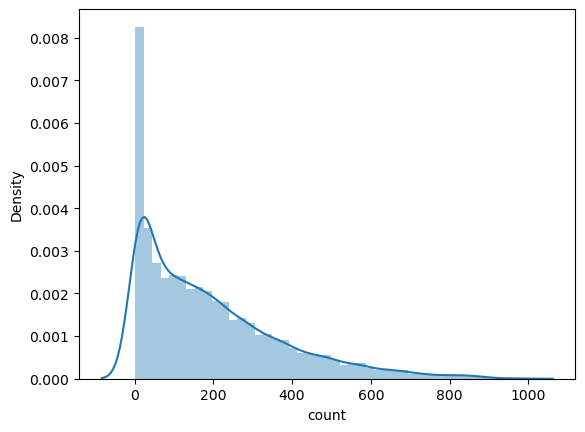

In [6]:
#checking distribution of target variable
sns.distplot(data["count"])

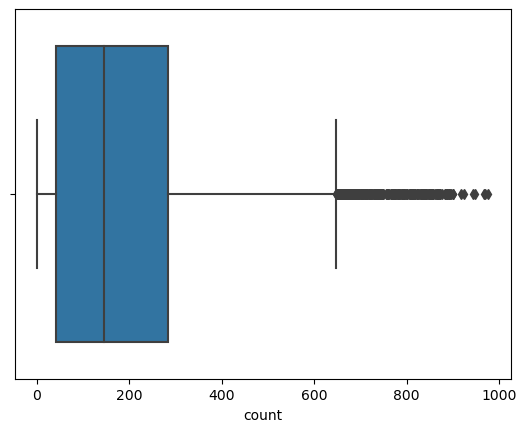

In [49]:
sns.boxplot(data['count']);

<AxesSubplot:xlabel='season', ylabel='count'>

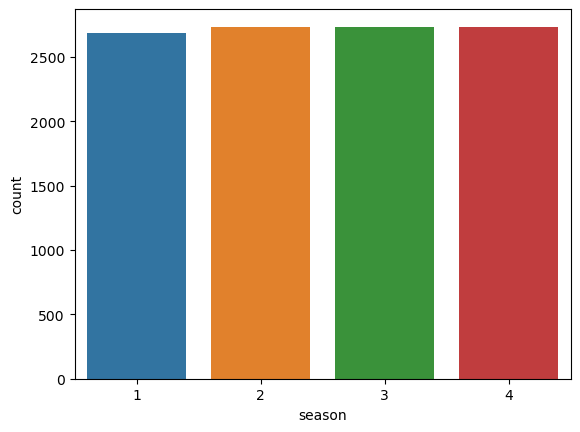

In [7]:
#categorical variables :season,holiday,workingday,weather
#numerical variable:temp,atemp,windspeed ,casual,registred

sns.countplot(data["season"])

<AxesSubplot:xlabel='season', ylabel='count'>

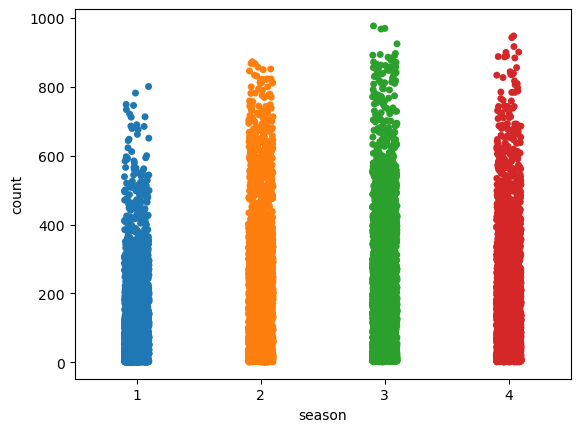

In [12]:
sns.stripplot(data['season'], data['count'], jitter=True)

1.for this analysis we will use our significance value(alpha)=0.05 for rejecting null hypothesis for all test.<br>
2.first we will visualise the data then check our intution with suitable test

In [9]:
unq_season=[1, 2, 3, 4]
seasons=[]
for i in unq_season:
    season=list(data[data["season"]==i]["count"].values)
    seasons.append(season)

In [10]:
#H0=season have no impact on bike demand 
#Ha=Atleast season have  impact on bike demand 

f_oneway(seasons[0],seasons[1],seasons[2],seasons[3])

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

Failed to reject null hypothesis  so season does not have much imapact on bike demad .

<AxesSubplot:xlabel='holiday', ylabel='count'>

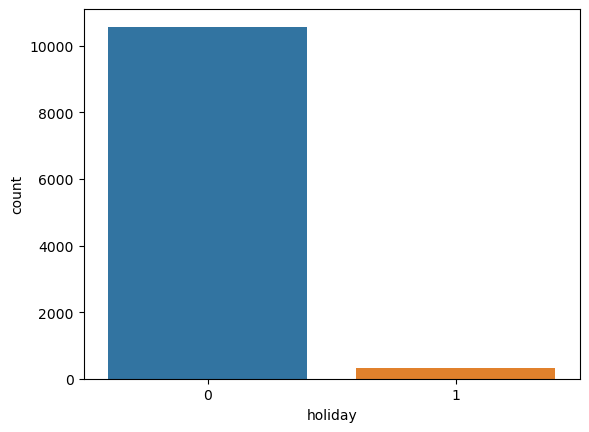

In [11]:
sns.countplot(data["holiday"])

<AxesSubplot:xlabel='holiday', ylabel='count'>

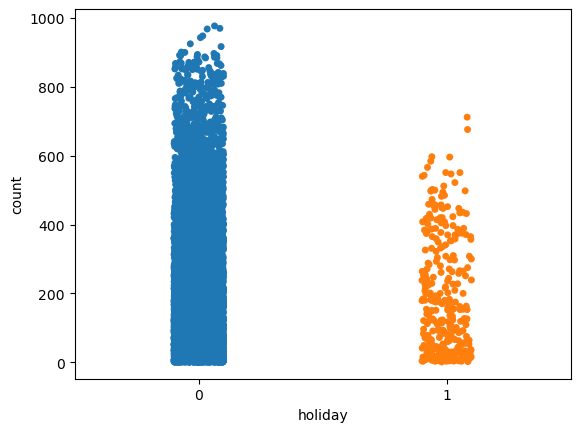

In [13]:
sns.stripplot(data['holiday'], data['count'], jitter=True)

In [18]:
unq_season=[0,1]
days=[]
for i in unq_season:
    season=list(data[data["holiday"]==i]["count"].values)
    days.append(season)

In [19]:
#H0=Holiday have no imapct on bike demand
#Ha=Holiday have imapact demand 
f_oneway(days[0],days[1])

F_onewayResult(statistic=0.3165625276833693, pvalue=0.5736923883252254)

1.Reject the hypothesis since p_value is high <br>
2.Deamand is less on holidays



<AxesSubplot:xlabel='workingday', ylabel='count'>

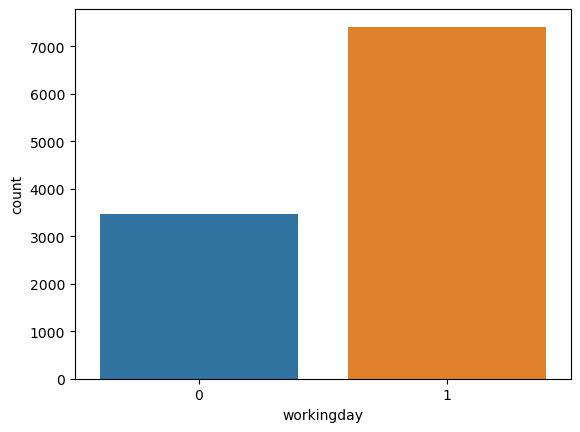

In [20]:
sns.countplot(data["workingday"])

<AxesSubplot:xlabel='workingday', ylabel='count'>

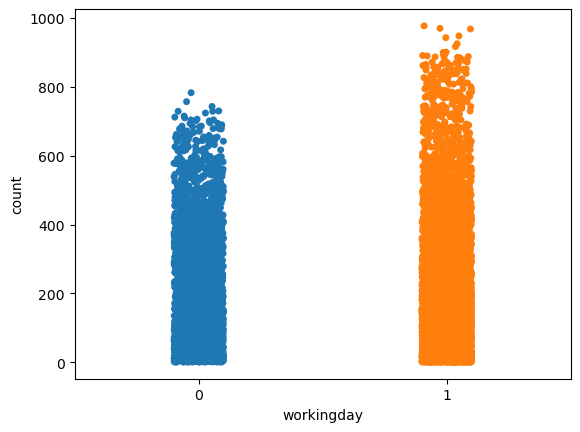

In [21]:
sns.stripplot(data['workingday'], data['count'], jitter=True)

In [22]:
day=[0,1]
w_days=[]
for i in day:
    season=list(data[data["workingday"]==i]["count"].values)
    w_days.append(season)
    

In [23]:
#H0=working day have no impact on demand
#H0=working day have  impact on demand
f_oneway(w_days[0],w_days[1])

F_onewayResult(statistic=1.4631992635777575, pvalue=0.22644804226428558)

1.reject null hypothesis <br>
2.working day does impact booking of bikes as we can reject null hypothesis since p_value is higher than significant value <br>
3.For non working day there is less demand we need to find new market so that we can leverage existing inventory to fullest. <br>
4.As fuel prices maybe hyperlocal startup could be taget for market place and could be served as cost optimization to them.

<AxesSubplot:xlabel='weather', ylabel='count'>

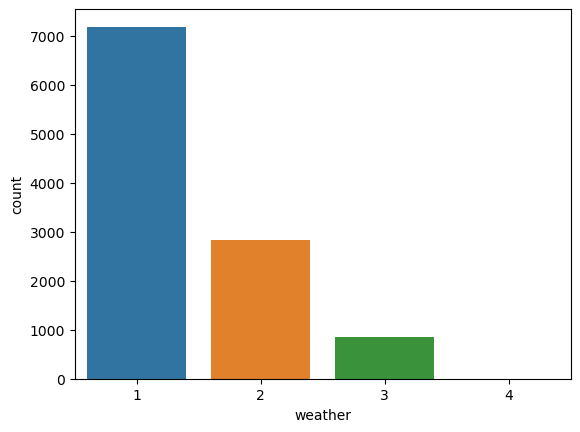

In [24]:
sns.countplot(data["weather"])

In [38]:
#Season_vs_weather
#Ho=Season and weather are independent
#H1=season and weteher are not independent
data_crosstab = pd.crosstab(data['season'],
data['weather'])
print(data_crosstab)
Season_vs_weather=data_crosstab.values


weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0


In [47]:
chi2_contingency(Season_vs_weather)

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

Since p_values is significant less than significant value we can infer season and weather are independent.

<AxesSubplot:>

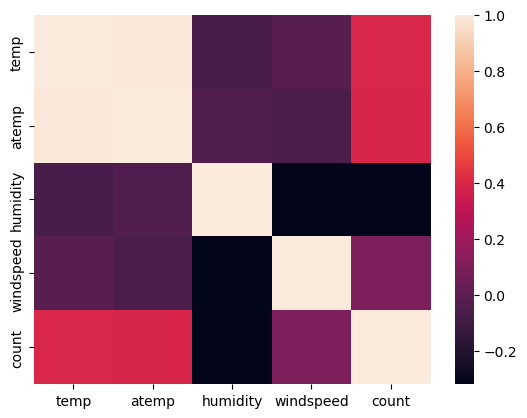

In [40]:
##Continous variable test
data_count=data[["temp","atemp","humidity","windspeed","count"]]
sns.heatmap(data_count.corr())

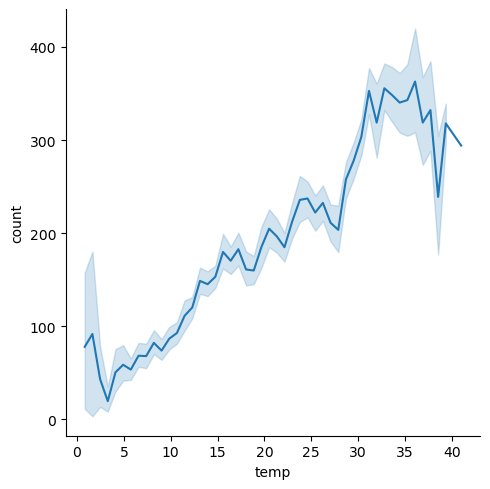

In [41]:
#temp vs Count
sns.relplot(data=data, x="temp", y="count", kind="line")

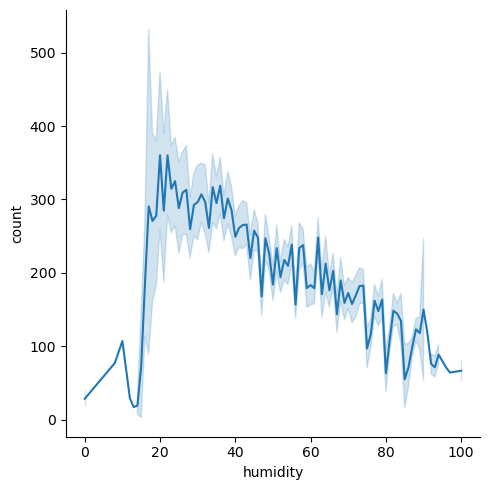

In [42]:
#humidity vs count
sns.relplot(data=data, x="humidity", y="count", kind="line")

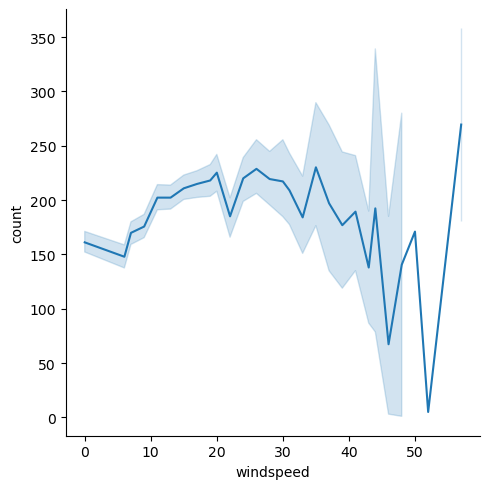

In [43]:
#windspeed vs count
sns.relplot(data=data, x="windspeed", y="count", kind="line")

In [44]:
from scipy.stats import spearmanr as sp
#H0=temp does not imact count
#Ha=temp impact count
sp(data["temp"],data["count"])

SpearmanrResult(correlation=0.40798939475098117, pvalue=0.0)

In [35]:
#H0=atemp does not imapcts count
#Ha=atemp impact count
sp(data["atemp"],data["count"])

SpearmanrResult(correlation=0.4065617539204584, pvalue=0.0)

In [45]:
#H0=atemp does not imapcts count
#Ha=atemp impact count
sp(data["humidity"],data["count"])

SpearmanrResult(correlation=-0.35404912201756106, pvalue=0.0)

In [46]:
#H0=atemp does not imapcts count
#Ha=atemp impact count
sp(data["windspeed"],data["count"])

SpearmanrResult(correlation=0.1357773747113304, pvalue=5.9015220272171205e-46)

1.Failed to reject hypothesis for atemp,temp,humidity,windspeed due to low p_value <br>
2.windspeed have very less corelation score <br>
3.temprature and humidity have small corelation where humidity and count is negatively corelated 
